# QPCA analysis of the MNIST Dataset 
In this notebook, we use both classical and quantum PCA to analyze the 
MNIST dataset (see [this paper](https://journals.aps.org/prxquantum/pdf/10.1103/PRXQuantum.3.030334)).

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.linalg import expm
from collections import defaultdict
from IPython.display import display
from keras.datasets import mnist

from qiskit_aer import *
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, PhaseEstimation
from qiskit.circuit.library.data_preparation import StatePreparation

import qPCA_funcs as QF

In [2]:
#checking that the dataset loading works
(X, y), _ = mnist.load_data()

# take subset of 5000 images
idx = np.random.choice(np.arange(y.shape[0]), size=5000, replace=False)
X=X[idx,:,:]
y=y[idx]

#printing the shapes of the vectors 
print('X: ' + str(X.shape))
print('Y: ' + str(y.shape))

# check that the labels are balanced
nums, counts = np.unique(y, return_counts=True)
for n, c in zip(nums, counts):
    print(f"{n}: {c} counts")

# we need to flatten the images into a 1D vector each
# so X is a 2D array
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
print(X.shape)
# compute covariance matrix
cov_matr = np.cov(X, rowvar=False)
print(f'Covariance matrix shape: {cov_matr.shape}')

X: (5000, 28, 28)
Y: (5000,)
0: 496 counts
1: 550 counts
2: 510 counts
3: 558 counts
4: 495 counts
5: 442 counts
6: 502 counts
7: 525 counts
8: 436 counts
9: 486 counts
(5000, 784)
Covariance matrix shape: (784, 784)


## Quantum PCA


Input State preparation...
Input Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Normalization factor:
 3435855.92

Padded Normalized Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

# qubits:
 20

Initial state circuit:


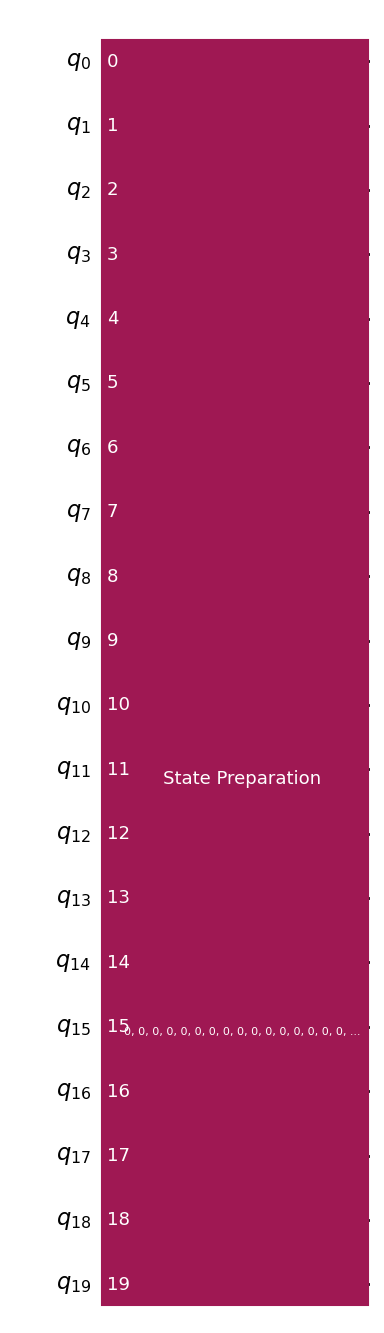


Unitary gate construction...

Building Phase Estimation circuit...


In [ ]:
eigvals, eigvecs = QF.run_qPCA(cov_matr, resolution=4, verbose=True)

In [ ]:
# input matrix for testing
matr = np.array([[1.5, 0.5],[0.5, 1.5]])
eigvals, eigvecs = QF.run_qPCA(matr, resolution=4, verbose=True)

## Classical PCA

(Quick drafts for now, rest to follow)

In [ ]:
# find the eigenvectors of the covariance matrix.
l, V = np.linalg.eig(cov_matr)
print (l[:5])
print (V[:5])
ratios = l/np.trace(cov_matr)

# ugly loop, replace later
# print eigvals of PCS explaining 75% of the variance
threshold = 0.75
sum = 0
i=0
while sum<threshold:
    print(np.real(ratios[i]))
    sum += ratios[i]
    i += 1

In [ ]:
# lazy version
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

print(pca.components_[:5])
print(pca.explained_variance_ratio_[:5])